In [1]:
from phidl import Device
from phidl import quickplot as qp # Rename "quickplot()" to the easier "qp()"
import phidl.geometry as pg
import phidl.utilities as pu
import layout

Load process layers and save layer properties file for Klayout visualization.

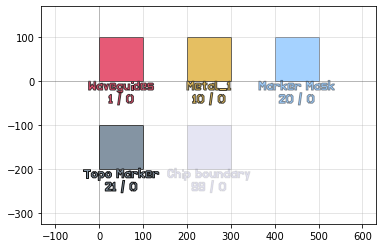

In [2]:
ls = layout.setup_layers()
P = pg.preview_layerset(ls)
qp(P)
# P.write_svg('Layers.svg')
pu.write_lyp('MyLayerSet.lyp', layerset = ls)

In [3]:
T = layout.chip(size=(9000,13000), name='delta_b30', text_size=150)

In [4]:
x0 = 4500 - 2000
y0 = 2300
dy = 930

pp = [5.2, 5.2, 5.2, 5.2, 5.2, 4.8, 4.8, 4.8, 4.8, 4.8]
for n in range(10):
    T << layout.OPO(radius=150, pp=pp[n], Lc=300).move([x0,y0+n*dy])
    T << layout.contact_pads(size=[300,200], label='+'+str(n+1), label_size=50).move([x0-50-300, y0+n*dy-250])
    T << layout.contact_pads(size=[200,250], label='-'+str(n+1), label_size=50).move([x0+4000+100, y0+n*dy-300])
    T << layout.contact_pads(size=[200,250], label='-', label_size=50).rotate(180).move([x0+2000, y0+n*dy+270])
    T << pg.rectangle([150,50], layer=10).move([x0-125,y0+n*dy-112.5])
    T << pg.rectangle([150,50], layer=10).move([x0+4000-25,y0+n*dy-112.5])
    for n2 in range(4):
        x2 = x0 + n2*1000
        y2 = y0-112.5-125 + n*dy
        T << layout.poling_region(period=pp[n], length=900).move([x2, y2])
        T << layout.contact_pads(size=[300,200], label='+'+str(n+1), label_size=50).move([x2, y2-150])


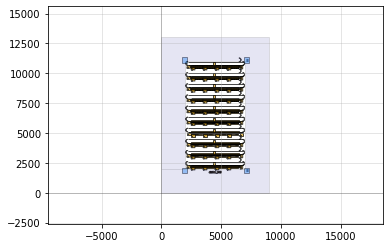

In [5]:
qp(T)

In [6]:
T.write_gds('test.gds')

'test.gds'